<a href="https://colab.research.google.com/github/PaulLipska/Coding_Dojo_Project_2/blob/main/Project2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project2 - Part 1: Project Selection
Independent Project Investigation

## Healthcare Dataset Stroke Data

### 1. Source of data:


https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### 2. Description:


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### 3. Target

Target is "Stroke" as function of contributing factors that share a commonality with people who have strokes

### 4. What does one row represent?

The row represents a patient

In [ ]:
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSL6N5Ag95sphKFojQBp-pJBbmZeIFFMPizEDHCdXomjDZWJJlEy0vlaEFQJYCzYK1JytY6JfxdppHO/pub?output=csv'
df = pd.read_csv(url)
df.head(1)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


### 5. Is this a classification or regression problem?

This is a classification problem

###  6. How many features does the data have?

In [ ]:
df.shape

(5110, 12)

This dataset has 12 features

### 7. How many rows are in this dataset?


5110 rows

### 8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

In [ ]:
#Investigating Missing Values
df[df.isna().any(axis=1)].shape

(201, 12)

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Moderate risk in resolving missing values on what is a key indicator for risk.  Error in inputation could ruin investigation.

## Heart Failure Prediction Dataset

### 1. Source of data:

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### 2. Description:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### 2. Target

The target for this investigation is heart disease as a function of predicting heart failure

### 3. What does one row represent?

In [ ]:
import pandas as pd
URL = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTlLSNmehBOPMkSLUzjyfyCdmHei2XrD4qVLq6WKZmOJHsTDKlf1BXGDS5Jlb6pWjBVIiTh1EIP4XwI/pub?output=csv'
df = pd.read_csv(URL)
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


The row is an investigation of individuals presenting an array of condtions that fall in the domanin of heart disease

### 4. Is this a classification or regression problem?

This is a classification problem since it is investigating those with and without heart disease

### 5. How many features does the data have?

In [ ]:
df.shape

(918, 12)

There are 12 features

### 6. How many rows are in this dataset?

There are 918 rows

### 7. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

In [ ]:
#Investigating Missing Values
df[df.isna().any(axis=1)].shape

(0, 12)

In [ ]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

There doesnt appear to be major issue with this data frame



---



# Project2 - Part 2: Heart Failure Prediction Data Set

### 1. Import Library


In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### 2. Import Data Set

In [3]:
import pandas as pd
URL ='https://docs.google.com/spreadsheets/d/e/2PACX-1vTlLSNmehBOPMkSLUzjyfyCdmHei2XrD4qVLq6WKZmOJHsTDKlf1BXGDS5Jlb6pWjBVIiTh1EIP4XwI/pub?output=csv'
df = pd.read_csv(URL)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df['HeartDisease'].unique()

array([0, 1])

### 3. Examine Data

In [5]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 918 rows, and 12 columns.
The rows represent 918 observations, and the columns represent 11 features and 1 target variable.


In [6]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Reviewing Unique Values for Object Columns

In [7]:
obj_cols = df.select_dtypes(include=['object'])
for col in obj_cols.columns:
    unique_vals = obj_cols[col].unique()
    print(col, unique_vals)

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


*  No abnormal values found

#### Reviewing Unique Values for Number Columns

In [8]:
# Display the descriptive statistics for the columns
df.describe(include="number")

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


*  No abnormal values found.  Cholesterol column max of 603 is possible with disease hypercholesterolemia



### 4. Clean the Data

#### Remove Unnecessary Columns


*   All Columns are needed




#### Remove Duplicate Rows


In [9]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#### Check for NAN values

In [10]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


### 5. Data Dictionary

#### Attribute Information


1.   Age: age of the patient [years]
2.   Sex: sex of the patient [M: Male, F: Female]
3.   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.   RestingBP: resting blood pressure [mm Hg]
5.   Cholesterol: serum cholesterol [mm/dl]
6.   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.  Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.  ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.  HeartDisease: output class [1: heart disease, 0: Normal]














### 6. Validating Data Types Match Data Dictionary

In [11]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

*Since there is not a strict data dictionary on Kaggle this Attribute Information is the best possible guide.  All values seem to fit nicely within the given Dtype*

### 7. Inspect Column Names for Errors

In [12]:
# Display column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

No spaces or misspelled columns

### 8. Create a Copy of the Dataset

In [13]:
# Create a copy of the dataset for Modeling
df_ml = df.copy()

### 9. Graphing Vizualizations

Overview for the dataframe in reference to the target column of HeartDisease


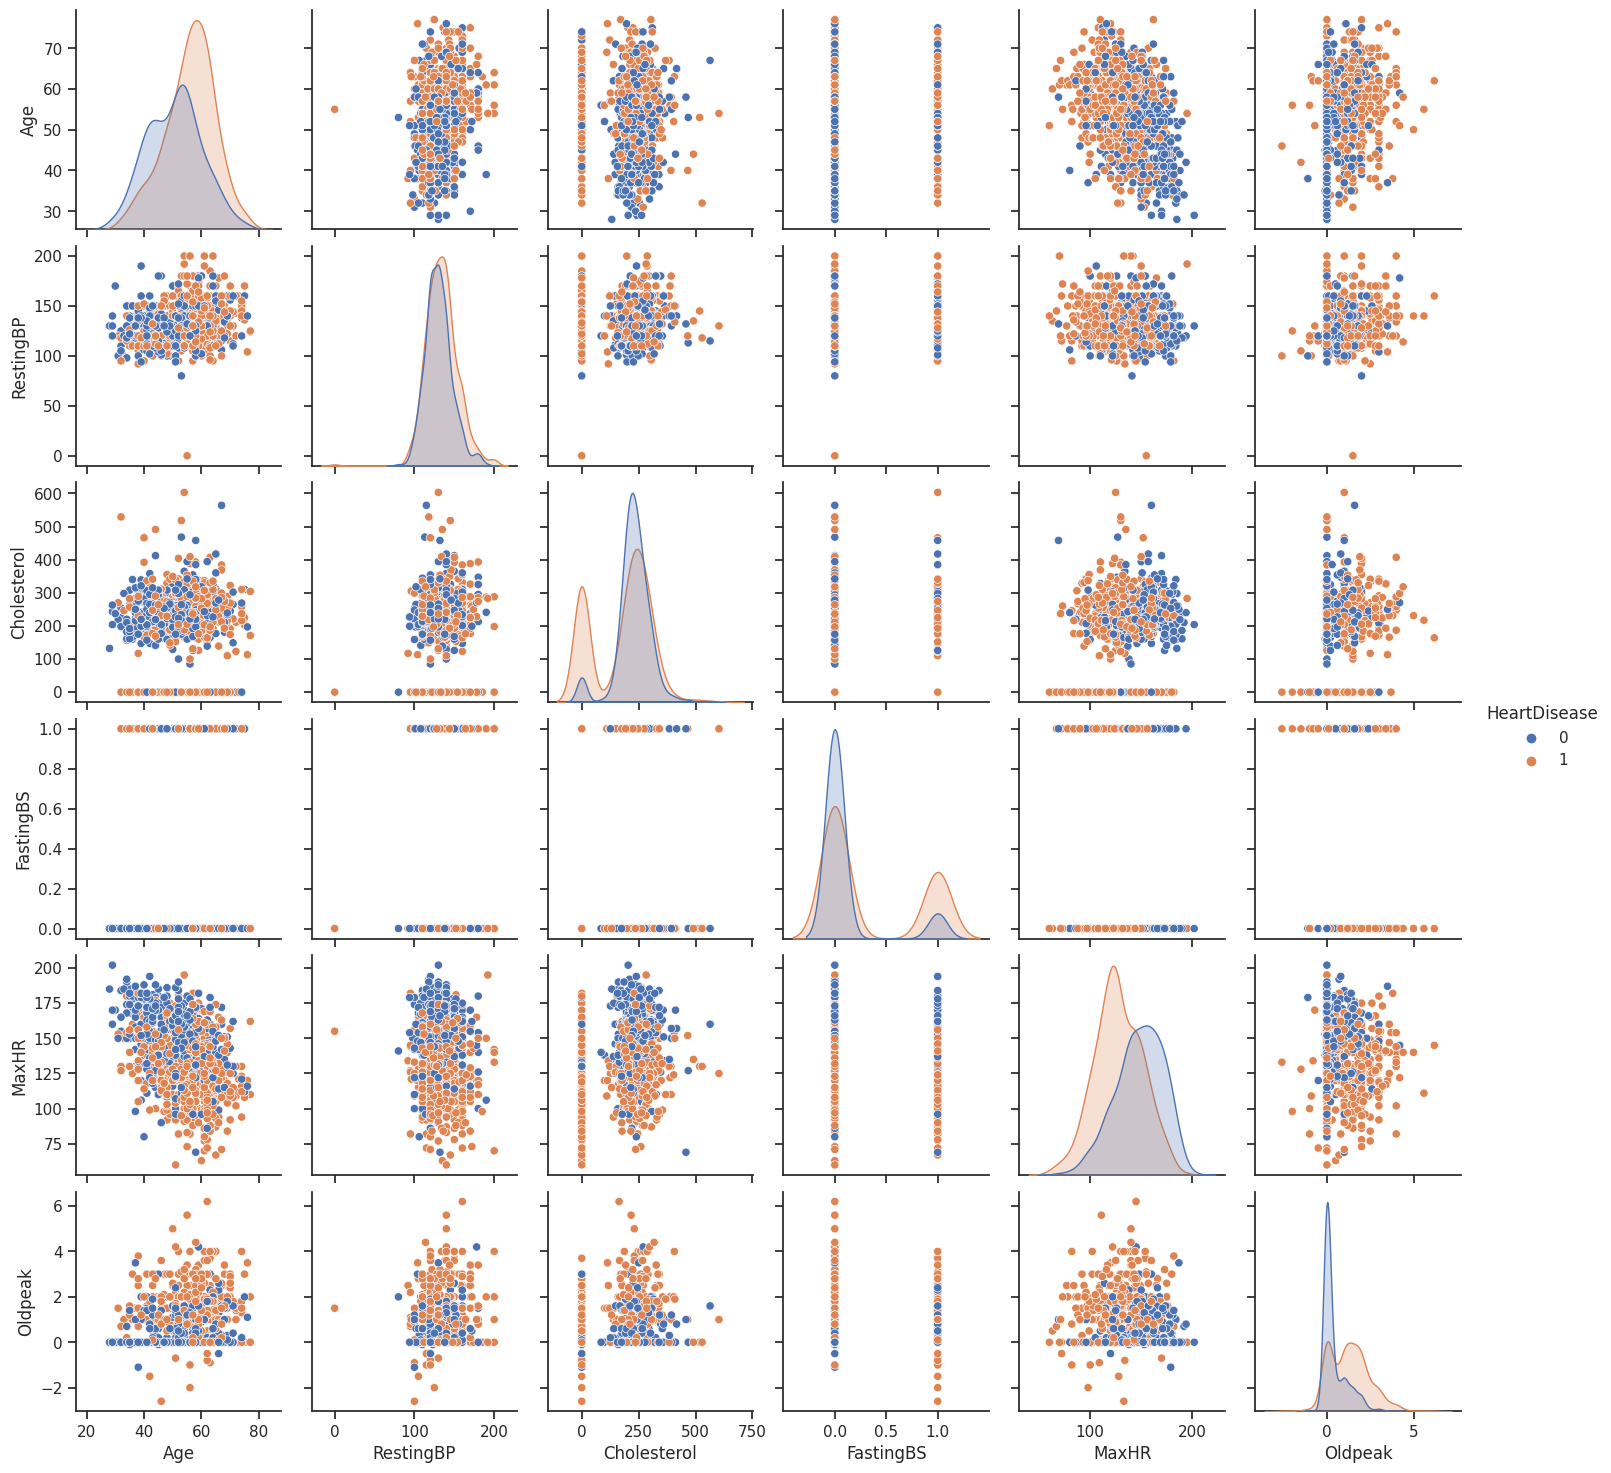

In [ ]:
sns.set_theme(style="ticks")

df = df_ml
sns.pairplot(df, hue="HeartDisease")
print('Overview for the dataframe in reference to the target column of HeartDisease')

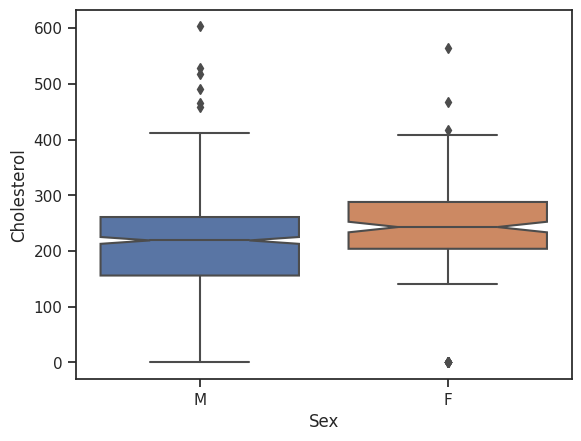

You can see cholesterol is higher in Women but Men tend to defy categorical measurement due to higher number of outliers.


In [ ]:
sns.boxplot(data=df, y='Cholesterol', x='Sex', notch=True)
plt.show()
print('You can see cholesterol is higher in Women but Men tend to defy categorical measurement due to higher number of outliers.')

# Project2 - Part 3: Correlation

In [ ]:
df_ml.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df_ml.corr()

<ipython-input-23-267a1b0b9cf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ml.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<ipython-input-14-92aa75548afc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_ml.corr(), annot = True);


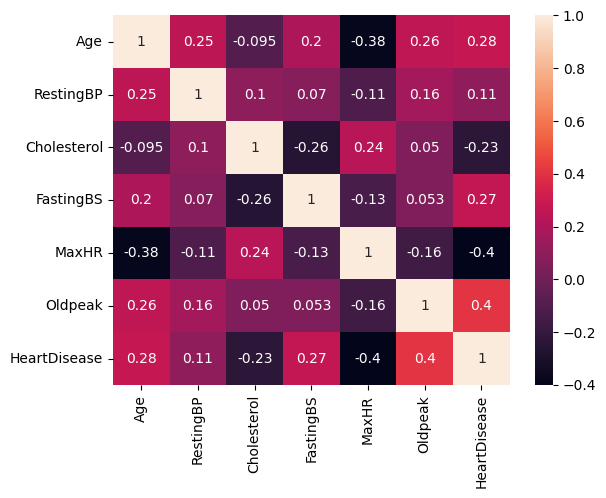

In [14]:
sns.heatmap(df_ml.corr(), annot = True);

*  You can see above there is strong correlation with Oldpeak and HeartDisease

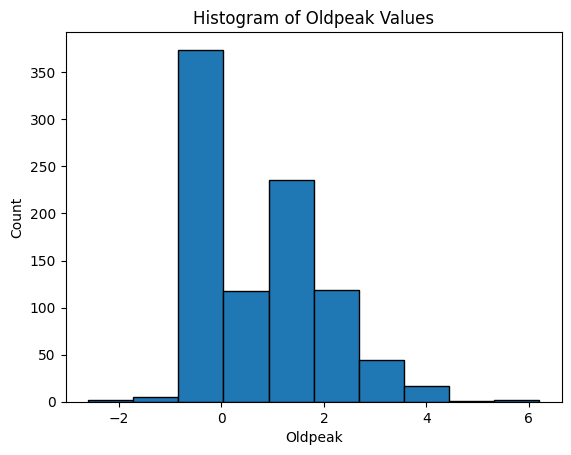

In [22]:
# Create a histogram of 'Oldpeak'
plt.hist(df_ml['Oldpeak'], bins=10, edgecolor='black')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.title('Histogram of Oldpeak Values')
plt.show()

*oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. This is a numerical value as related to the above

### OldPeak has high correlation with Heart Disease the above graph illustrates the values among group participants.  This diagnostic measures the slope positive or negative from an ekg after exercise

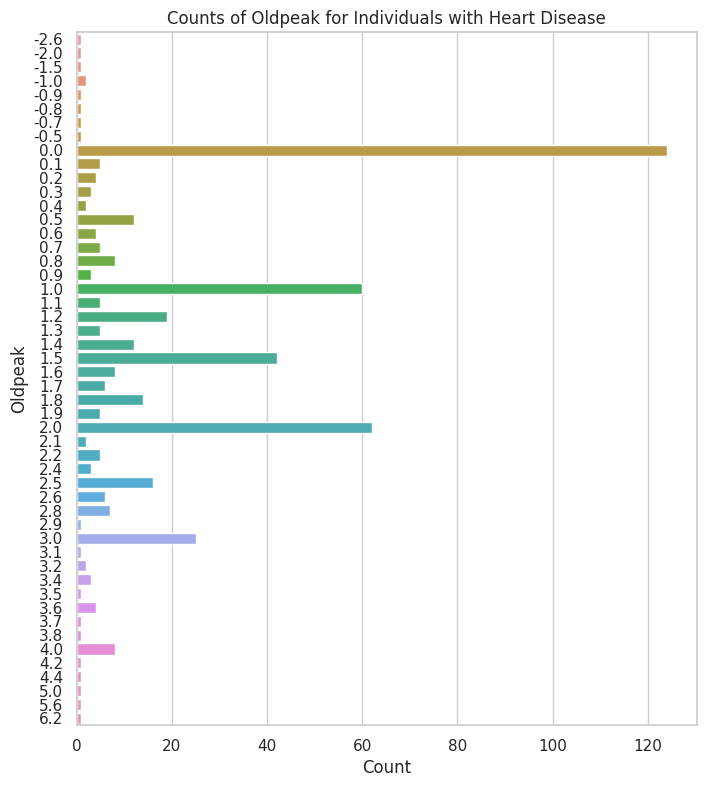

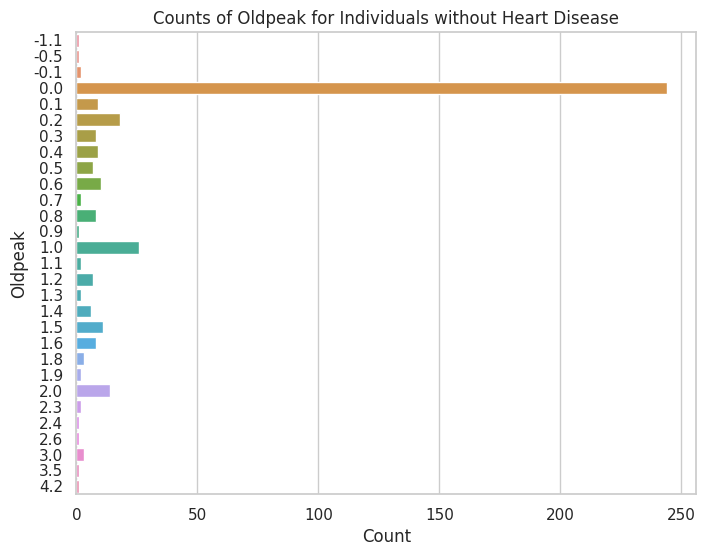

In [48]:
# Create a countplot for individuals with heart disease
df_hd = df_ml[df_ml['HeartDisease'] == 1]
sns.set_style('whitegrid')
plt.figure(figsize=(8,9))
sns.countplot(y="Oldpeak", data=df_hd)
plt.title('Counts of Oldpeak for Individuals with Heart Disease')
plt.ylabel('Oldpeak')
plt.xlabel('Count')
plt.show()

# Create a countplot for individuals without heart disease
df_no_hd = df_ml[df_ml['HeartDisease'] == 0]
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(y="Oldpeak", data=df_no_hd)
plt.title('Counts of Oldpeak for Individuals without Heart Disease')
plt.ylabel('Oldpeak')
plt.xlabel('Count')
plt.show()

*  You can see above the two graphs show the values of old peak as they related to individuals with and without heart disease.  

### Per the previous graph you can see incidence of heart disease as it correlates with different values of Oldpeak.  The value of 0 has the highest incidence of heart disease but also the highest incidence of testing negative.  As oldpeak rises we see those testing negative plummeting.  We can reasonably infer this is an inflection point between those who have heart disease and those who are about to get it.

# Project 2 - Part 4: Model Development

### 1. Import Library

In [ ]:
# import libraries

## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Models
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report)
from sklearn.model_selection import cross_val_score


## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

## Tree Model Visualization
from sklearn.tree import plot_tree

# Misc
import warnings
warnings.filterwarnings('ignore')

### 2. Import Data Set

In [ ]:
import pandas as pd
URL ='https://docs.google.com/spreadsheets/d/e/2PACX-1vTlLSNmehBOPMkSLUzjyfyCdmHei2XrD4qVLq6WKZmOJHsTDKlf1BXGDS5Jlb6pWjBVIiTh1EIP4XwI/pub?output=csv'
df = pd.read_csv(URL)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### 3. Examine Data

In [ ]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 918 rows, and 12 columns.
The rows represent 918 observations, and the columns represent 11 features and 1 target variable.


#### Reviewing Unique Values for Object Columns

In [ ]:
obj_cols = df.select_dtypes(include=['object'])
for col in obj_cols.columns:
    unique_vals = obj_cols[col].unique()
    print(col, unique_vals)

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


*  No abnormal values found

#### Reviewing Unique Values for Number Columns

In [ ]:
# Display the descriptive statistics for the columns
df.describe(include="number") #'number' or 'object'

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


*  No abnormal values found.  Cholesterol column max of 603 is possible with disease hypercholesterolemia

### 4. Clean the Data


#### Remove Unnecessary Columns


*   All Columns are needed

#### Remove Duplicate Rows

In [ ]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


#### Check for NAN values

In [ ]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


### 5. Data Dictionary

#### Attribute Information


1.   Age: age of the patient [years]
2.   Sex: sex of the patient [M: Male, F: Female]
3.   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.   RestingBP: resting blood pressure [mm Hg]
5.   Cholesterol: serum cholesterol [mm/dl]
6.   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.  Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.  ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.  HeartDisease: output class [1: heart disease, 0: Normal]


### 6. Validating Data Types Match Data Dictionary

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

*Since there is not a strict data dictionary on Kaggle this Attribute Information is the best possible guide.  All values seem to fit nicely within the given Dtype*

### 7. Inspect Column Names for Errors

In [ ]:
# Display column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

No Spaces or misspelled columns

### 8. Create a Copy of the Dataset

In [ ]:
# Create a copy of the dataset for Modeling
df_ml = df.copy()

### 8a. Check Class Balance

In [ ]:
# Check how many samples of each class are present
df_ml['HeartDisease'].value_counts(normalize=False)

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
# Check how many samples of each class are present
df_ml['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

### 9. Performing Validation Split

In [ ]:
#Arrange Data info features matrix and target vector
target = 'HeartDisease'

labels=['No Heart Disease', 'Heart Disease']

X = df_ml.drop(columns = [target], axis=1)
y = df_ml[target]
## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat
362,56,M,NAP,155,0,0,ST,99,N,0.0,Flat
869,59,M,NAP,150,212,1,Normal,157,N,1.6,Up
101,51,M,ASY,130,179,0,Normal,100,N,0.0,Up
199,57,F,TA,130,308,0,Normal,98,N,1.0,Flat


### 10. Create Column Transformer

In [ ]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)
# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Combine the Pipelines and ColumnSelectors into tuples for the ColumnTransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)
# Create the preprocessing ColumnTransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA6D0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA040>)])

### 11. Models

#### Random Forest

In [ ]:
## Create an instance of the model
ran_for = RandomForestClassifier(42)
## Create a model pipeline
ran_for_pipe = make_pipeline(preprocessor, ran_for)
## Fit the model
ran_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA6D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA040>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=42))])

##### 12. Random Forest Predictions

In [ ]:
## Save the model's predictions for the train dataset
ran_for_train_preds = ran_for_pipe.predict(X_train)
## Save the model's predictions for the test dataset
ran_for_test_preds = ran_for_pipe.predict(X_test)

##### 13. Random Forest Accuracy 

In [ ]:
# Calculate the accuracy score
accuracy_rf1 = accuracy_score(y_train, ran_for_train_preds)
print("Accuracy score on the Random Forest train set: ", accuracy_rf1)
accuracy_rf2 = accuracy_score(y_test, ran_for_test_preds)
print("Accuracy score on the Random Forest test set: ", accuracy_rf2)

Accuracy score on the Random Forest train set:  1.0
Accuracy score on the Random Forest test set:  0.8869565217391304


##### 14. Random Forest Matrix Heatmaps

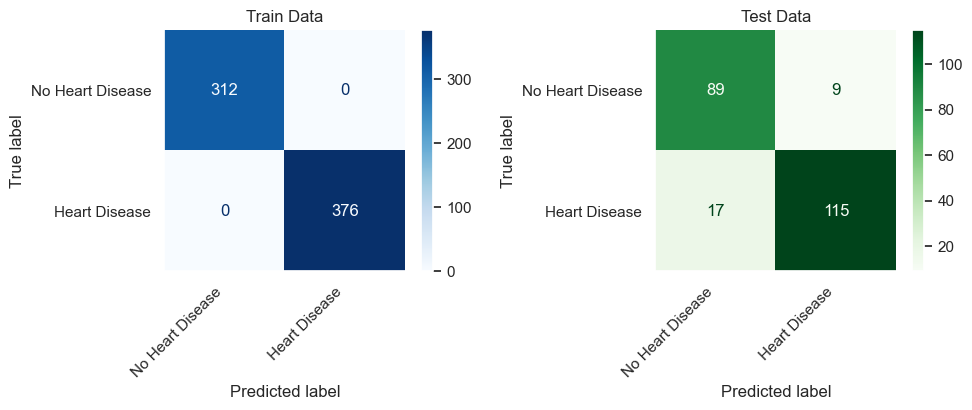

In [ ]:

# Create the confusion matrix for the training data
cm_train = confusion_matrix(y_train, ran_for_train_preds)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=labels)

# Create the confusion matrix for the test data
cm_test = confusion_matrix(y_test, ran_for_test_preds)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=labels)

# Plot the confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

disp_train.plot(ax=axs[0], cmap='Blues', values_format='d')
disp_test.plot(ax=axs[1], cmap='Greens', values_format='d')

axs[0].set_xticklabels(labels, rotation=45, ha='right')
axs[1].set_xticklabels(labels, rotation=45, ha='right')

axs[0].set_title('Train Data')
axs[1].set_title('Test Data')

for ax in axs:
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


*  You can see from the matrix that there are few false negatives or positives on the training set which means there will be little to no incorrect results given this set of data regarding someones status of Heart Disease.  It doesn't necessarily follow that will remain true in the testing set.  We can evaluate the model fit with cross-validation

#### 15. Cross-Validation of Random Forest

Cross-validation scores: [0.86231884 0.92028986 0.85507246 0.86861314 0.86131387]
Mean cross-validation score: 0.873521633343912
Standard deviation of cross-validation scores: 0.023775045013343234


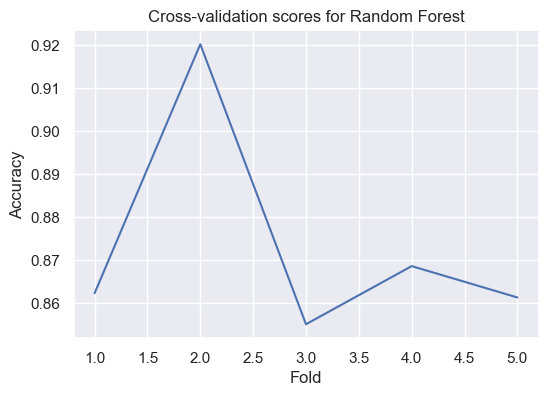

In [ ]:
## Create an instance of the model
Alt_ran_for = RandomForestClassifier(random_state=42)
## Create a model pipeline
Alt_ran_for_pipe = make_pipeline(preprocessor, Alt_ran_for)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(Alt_ran_for_pipe, X_train, y_train, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(1, len(cv_scores)+1), cv_scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-validation scores for Random Forest')
plt.show()

*  The cross validation score shows an accuracy of .87 over the folds

#### 16. Random Forest GridSearchCV

In [ ]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Combine the Pipelines and ColumnSelectors into tuples for the ColumnTransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)

# Define the parameter grid for the random forest model
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [5, 10, None],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [1, 2]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=ran_for_pipe, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA6D0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA040>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(n_estimators=42))]),
             param_grid={'randomforestclassifier__max_depth': [5, 10, None],
                         'randomforestclassifier__min_samples_leaf': [1, 2],
                         'randomforestclassifier__min_samples_split': [2, 5],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  200]})

##### 17.Finding Best Parms for RandomForest GridsearchCV

In [ ]:
grid_search.best_params_

{'randomforestclassifier__max_depth': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 100}

##### 18. Trying GridsearchCV best fit on model

In [ ]:
## Create an instance of the model
ran_for_grid = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2)
## Create a model pipeline
ran_for_pipe_grid = make_pipeline(preprocessor, ran_for_grid)
## Fit the model
ran_for_pipe_grid.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA6D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA040>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=50))])

##### 19. Random Forest GridSearchCV Predictions

In [ ]:
## Save the model's predictions for the train dataset
ran_for_train_grid = ran_for_pipe_grid.predict(X_train)
## Save the model's predictions for the test dataset
ran_for_test_grid = ran_for_pipe_grid.predict(X_test)

##### 20.Visualization of Training and Test Data for Random Forest GridSearchCV

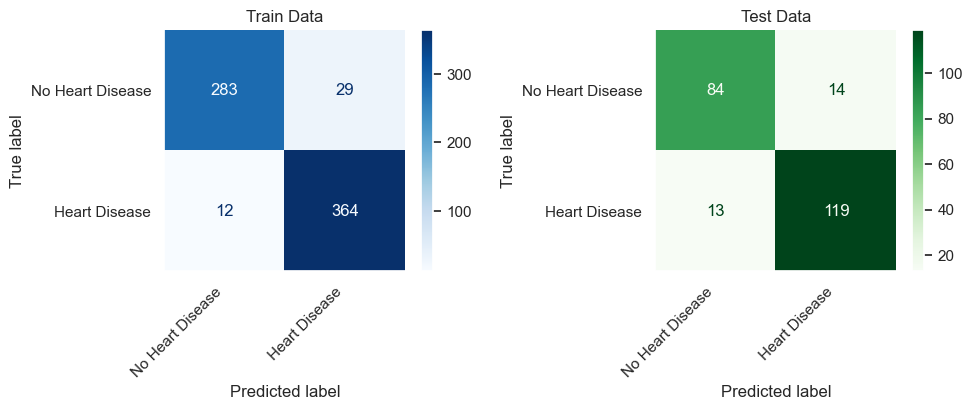

In [ ]:
# Create the confusion matrix for the training data
cm_train = confusion_matrix(y_train, ran_for_train_grid)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=labels)

# Create the confusion matrix for the test data
cm_test = confusion_matrix(y_test, ran_for_test_grid)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=labels)

# Plot the confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

disp_train.plot(ax=axs[0], cmap='Blues', values_format='d')
disp_test.plot(ax=axs[1], cmap='Greens', values_format='d')

axs[0].set_xticklabels(labels, rotation=45, ha='right')
axs[1].set_xticklabels(labels, rotation=45, ha='right')

axs[0].set_title('Train Data')
axs[1].set_title('Test Data')

for ax in axs:
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


*  While the training set is less accurate the testing set does have a higher chance of accuracy

##### 21. Random Forest GridSearchCV Accuracy

In [ ]:
# Calculate the accuracy score
accuracy_grid1 = accuracy_score(y_train, ran_for_train_grid)
print("Accuracy score on GridsearchCV RandomForest train set: ", accuracy_grid1)
accuracy_grid2 = accuracy_score(y_test, ran_for_test_grid)
print("Accuracy score on GridsearchCV RandomForest test set: ", accuracy_grid2)

Accuracy score on GridsearchCV RandomForest train set:  0.940406976744186
Accuracy score on GridsearchCV RandomForest test set:  0.8826086956521739


#### 22. Random Forest with PCA

In [ ]:
# Perform PCA
pca = PCA(n_components=10)


ran_for_pca_pipe = make_pipeline(preprocessor, pca, ran_for)

# Fit pipeline
ran_for_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11E575670>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11E575580>)])),
                ('pca', PCA(n_components=10)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=42))])

##### 23. Random Forest PCA Predictions

In [ ]:
## Save the model's predictions for the train dataset
ran_for_pca_train = ran_for_pca_pipe.predict(X_train)
## Save the model's predictions for the test dataset
ran_for_pca_test = ran_for_pca_pipe.predict(X_test)

##### 24.Visualization of Training and Test Data for Random Forest PCA

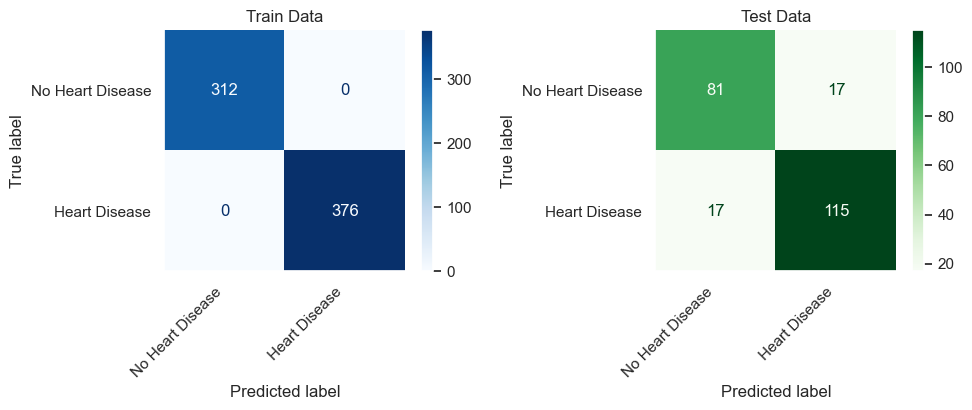

In [ ]:
# Create the confusion matrix for the training data
cm_train = confusion_matrix(y_train, ran_for_pca_train)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=labels)

# Create the confusion matrix for the test data
cm_test = confusion_matrix(y_test, ran_for_pca_test)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=labels)

# Plot the confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

disp_train.plot(ax=axs[0], cmap='Blues', values_format='d')
disp_test.plot(ax=axs[1], cmap='Greens', values_format='d')

axs[0].set_xticklabels(labels, rotation=45, ha='right')
axs[1].set_xticklabels(labels, rotation=45, ha='right')

axs[0].set_title('Train Data')
axs[1].set_title('Test Data')

for ax in axs:
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


*  The gridsearch CV results and the PCA results for Random Forest are nearly identical.  You can see the difference in the visualizations but the end result in terms of accuracy is the same.

##### 25. Random Forest PCA Accuracy

In [ ]:
# Calculate the accuracy score
accuracy_ran_for_pca1 = accuracy_score(y_train, ran_for_pca_train)
print("Accuracy score on PCA RandomForest train set: ", accuracy_grid1)
accuracy_ran_for_pca2 = accuracy_score(y_test, ran_for_pca_test)
print("Accuracy score on PCA RandomForest test set: ", accuracy_grid2)

Accuracy score on PCA RandomForest train set:  0.940406976744186
Accuracy score on PCA RandomForest test set:  0.8826086956521739


#### XGBoost

In [ ]:
## Create an instance of the model
xgb = XGBClassifier(random_state=42)

## Create a model pipeline
xgb_pipe = make_pipeline(preprocessor, xgb)

## Fit the model
xgb_pipe.fit(X_train, y_train)


[03:18:35] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11B8AA6D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

##### 26. XGBoost Predictions

In [ ]:
## Save the model's predictions for the train dataset
xgboost_train = xgb_pipe.predict(X_train)
## Save the model's predictions for the test dataset
xgboost_test = xgb_pipe.predict(X_test)

##### 27.Visualization of Training and Test Data for XGBoost

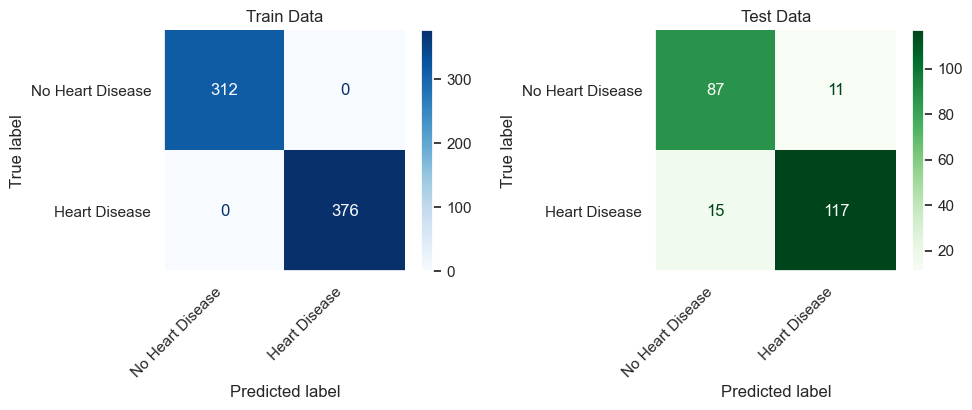

In [ ]:
# Create the confusion matrix for the training data
cm_train = confusion_matrix(y_train, xgboost_train)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=labels)

# Create the confusion matrix for the test data
cm_test = confusion_matrix(y_test, xgboost_test)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=labels)

# Plot the confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

disp_train.plot(ax=axs[0], cmap='Blues', values_format='d')
disp_test.plot(ax=axs[1], cmap='Greens', values_format='d')

axs[0].set_xticklabels(labels, rotation=45, ha='right')
axs[1].set_xticklabels(labels, rotation=45, ha='right')

axs[0].set_title('Train Data')
axs[1].set_title('Test Data')

for ax in axs:
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

*  You can see the XGBoost provides a score .01 better than random Forest

##### 28. XGBoost Accuracy

In [ ]:
# Calculate the accuracy score
accuracy_xg1 = accuracy_score(y_train, xgboost_train)
print("Accuracy score on GridsearchCV XGBoost train set: ", accuracy_xg1)
accuracy_xg2 = accuracy_score(y_test, xgboost_test)
print("Accuracy score on GridsearchCV XGBoost test set: ", accuracy_xg2)

Accuracy score on GridsearchCV XGBoost train set:  1.0
Accuracy score on GridsearchCV XGBoost test set:  0.8869565217391304


#### 29. Cross-Validation of XGBoost

[03:18:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

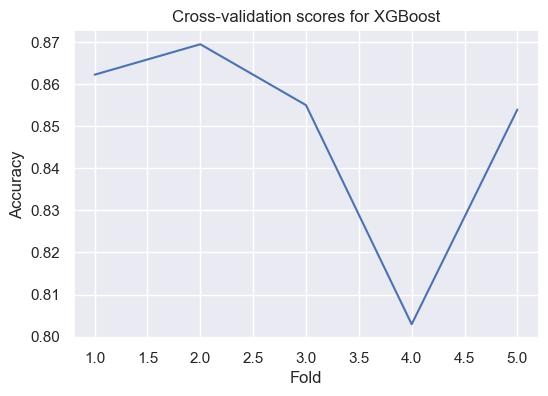

In [ ]:
## Create an instance of the model
Alt_xgboost = XGBClassifier(random_state=42)
## Create a model pipeline
Alt_xgboost_pipe = make_pipeline(preprocessor, Alt_xgboost)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(Alt_xgboost_pipe, X_train, y_train, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(1, len(cv_scores)+1), cv_scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-validation scores for XGBoost')
plt.show()

*  Cross validation shows .85 accuracy over folds

#### 30. GridSearchCV of XGBoost

In [ ]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(scaler)
cat_pipe = make_pipeline(ohe)

# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Combine the Pipelines and ColumnSelectors into tuples for the ColumnTransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)

# Create the preprocessing ColumnTransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')

# Create a model pipeline
xgb = XGBClassifier(random_state=42)
xgb_pipe = make_pipeline(preprocessor, xgb)

# Define the parameter grid for GridSearchCV
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.5],
    'xgbclassifier__subsample': [0.5, 0.7, 1.0],
    'xgbclassifier__colsample_bytree': [0.5, 0.7, 1.0]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_pipe, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


[03:18:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:18:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:42] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:18:47] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:18:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:18:56] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:06] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:10] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:24] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:37] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:41] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:45] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:19:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:19:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:00] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:17] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:25] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:28] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:32] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:39] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:43] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:48] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:20:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:53] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:08] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:13] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:14] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:18] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:23] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:29] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:30] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:33] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:21:34] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

[03:21:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters found:  {'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 7, 'xgbclassifier__n_estimators': 300, 'xgbclassifier__subsample': 0.5}
Best score:  0.874928594097112


##### 27.Finding Best Parms for XGBoost GridsearchCV

In [ ]:
grid_search.best_params_

{'xgbclassifier__colsample_bytree': 0.5,
 'xgbclassifier__learning_rate': 0.01,
 'xgbclassifier__max_depth': 7,
 'xgbclassifier__n_estimators': 300,
 'xgbclassifier__subsample': 0.5}

##### 28. Trying GridsearchCV best fit on model XGBoost

In [ ]:
## Create an instance of the model
XGBoost_grid = XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.5, random_state=42)
## Create a model pipeline
XGBoost_grid_pipe = make_pipeline(preprocessor, XGBoost_grid)
## Fit the model
XGBoost_grid_pipe.fit(X_train, y_train)

[03:21:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11E575670>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.5,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

##### 29. XGBoost GridSearchCV Predictions

In [ ]:
## Save the model's predictions for the train dataset
xgboost_train_grid = XGBoost_grid_pipe.predict(X_train)
## Save the model's predictions for the test dataset
xgboost_test_grid = XGBoost_grid_pipe.predict(X_test)

##### 30.Visualization of Training and Test Data for XGBoost GridSearchCV

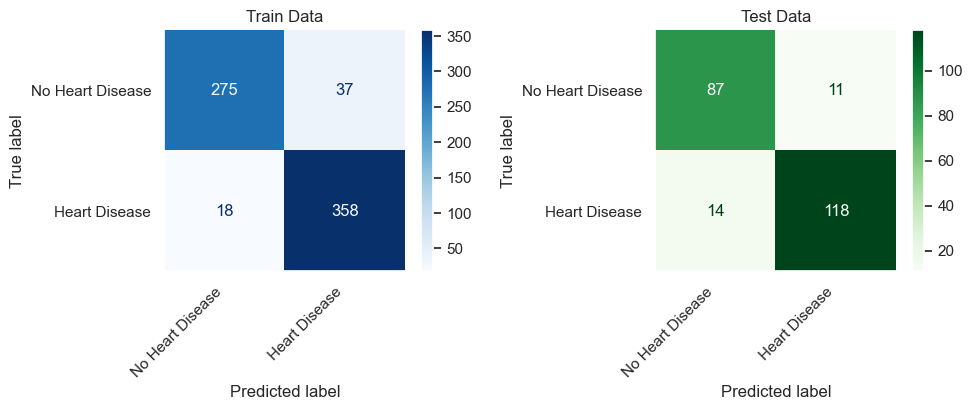

In [ ]:
# Create the confusion matrix for the training data
cm_train = confusion_matrix(y_train, xgboost_train_grid)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=labels)

# Create the confusion matrix for the test data
cm_test = confusion_matrix(y_test, xgboost_test_grid)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=labels)

# Plot the confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

disp_train.plot(ax=axs[0], cmap='Blues', values_format='d')
disp_test.plot(ax=axs[1], cmap='Greens', values_format='d')

axs[0].set_xticklabels(labels, rotation=45, ha='right')
axs[1].set_xticklabels(labels, rotation=45, ha='right')

axs[0].set_title('Train Data')
axs[1].set_title('Test Data')

for ax in axs:
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

*  You can see the false positives and false negatives decrease in this treatment of the model as well as the accuracy of the model increased from the original XGBoost

##### 31. XGBoost GridSearchCV Accuracy

In [ ]:
# Calculate the accuracy score
accuracy_xg_grid1 = accuracy_score(y_train, xgboost_train_grid)
print("Accuracy score on GridsearchCV XGBoost train set: ", accuracy_xg_grid1)
accuracy_xg_grid2 = accuracy_score(y_test, xgboost_test_grid)
print("Accuracy score on GridsearchCV XGBoost test set: ", accuracy_xg_grid2)

Accuracy score on GridsearchCV XGBoost train set:  0.9200581395348837
Accuracy score on GridsearchCV XGBoost test set:  0.8913043478260869


#### PCA with XGBoost

In [ ]:
# Perform PCA
pca = PCA(n_components=10)

XGBoost_pca_pipe = make_pipeline(preprocessor, pca, xgb)

# Fit pipeline
XGBoost_pca_pipe.fit(X_train, y_train)


[04:44:54] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E11E575670>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

##### 31. XGBoost with PCA Predictions

In [ ]:
## Save the model's predictions for the train dataset
xg_pca_train_grid = XGBoost_pca_pipe.predict(X_train)
## Save the model's predictions for the test dataset
xg_pca_test_grid = XGBoost_pca_pipe.predict(X_test)

##### 32.Visualization of Training and Test Data for XGBoost PCA

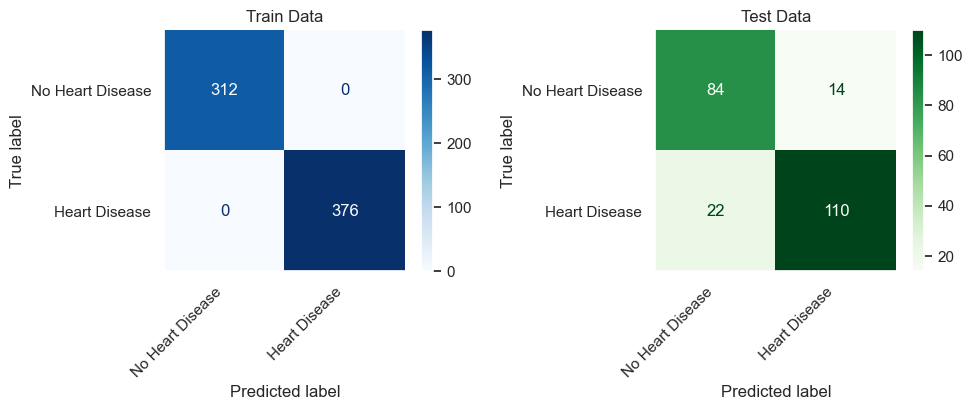

In [ ]:
# Create the confusion matrix for the training data
cm_train = confusion_matrix(y_train, xg_pca_train_grid)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=labels)

# Create the confusion matrix for the test data
cm_test = confusion_matrix(y_test, xg_pca_test_grid)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=labels)

# Plot the confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

disp_train.plot(ax=axs[0], cmap='Blues', values_format='d')
disp_test.plot(ax=axs[1], cmap='Greens', values_format='d')

axs[0].set_xticklabels(labels, rotation=45, ha='right')
axs[1].set_xticklabels(labels, rotation=45, ha='right')

axs[0].set_title('Train Data')
axs[1].set_title('Test Data')

for ax in axs:
    ax.grid(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

*  While the accuracy scores of this model and XGBoost GridsearchCV are nearly identical you can see the training and test set graph out different values but arrive at the same conclusion

##### 33. XGBoost with PCA Accuracy

In [ ]:
# Calculate the accuracy score
accuracy_xg_pca1 = accuracy_score(y_train, xg_pca_train_grid)
print("Accuracy score on XGBoost with PCA train set: ", accuracy_xg_grid1)
accuracy_xg_pca2 = accuracy_score(y_test, xg_pca_test_grid)
print("Accuracy score on XGBoost with PCA test set: ", accuracy_xg_grid2)

Accuracy score on XGBoost with PCA train set:  0.9200581395348837
Accuracy score on XGBoost with PCA test set:  0.8913043478260869
